#####  목표
1. 문제 정의
- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자

##### 2. 데이터 수집

In [1]:
import pandas as pd

In [28]:
# label 컬럼 index로 받아오기
data = pd.read_csv('bmi_lbs.csv' , index_col = 'Label')
data

,Gender,Height,Weight(lbs)
Label,,,
Obesity,Male,174,211.6416
Normal,Male,189,191.8002
Obesity,Female,185,242.5060
Overweight,Female,195,229.2784
Overweight,Male,149,134.4806
...,...,...,...
Extreme Obesity,Female,150,337.3038
Obesity,Female,184,266.7566
Extreme Obesity,Female,141,299.8256


#####  3. 데이터 전처리

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       500 non-null    object 
 1   Height       500 non-null    int64  
 2   Weight(lbs)  500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.6+ KB


In [15]:
# Gender 컬럼의 값을 바꾸자
# Male > 1 
# FeMale > 2 

In [29]:
# map 사용해서 데이터 컬럼 값 바꾸기(딕셔너리 형태)
data["Gender"]= data["Gender"].map({"Male":1,'Female':2})

#####  4. EDA(탐색적 데이터 분석)

In [4]:
import matplotlib.pyplot as plt

In [5]:
def myScatter (label,color):
    tmp = data.loc[label]
    plt.scatter(tmp['Weight(lbs)'],
               tmp['Height'],
               c = color,
               label = label)

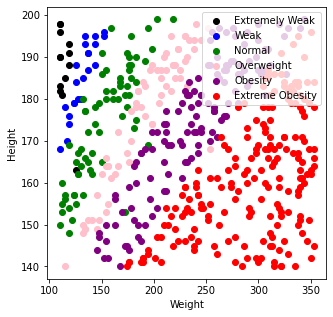

In [6]:
# scatter 그래프 그리기
plt.figure(figsize = (5,5))
#plt.scatter(data["Height"],data["Weight(lbs)"])
myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')
plt.legend(loc='upper right')
plt.xlabel('Weight') 
plt.ylabel('Height')
plt.show()

In [7]:
def myScatter (label,color):
    tmp = data.loc[label]
    plt.scatter(tmp['Weight(lbs)'],
               tmp['Height'],
               c = color,
               label = label)

In [8]:
data

,Gender,Height,Weight(lbs)
Label,,,
Obesity,Male,174,211.6416
Normal,Male,189,191.8002
Obesity,Female,185,242.5060
Overweight,Female,195,229.2784
Overweight,Male,149,134.4806
...,...,...,...
Extreme Obesity,Female,150,337.3038
Obesity,Female,184,266.7566
Extreme Obesity,Female,141,299.8256


#####  모델 선택 및 하이퍼 파라미터 튜닝
1. 문제와 답으로 분리
2. 훈련세트와 평가세트로 분리
3. 모델생성 및 하이퍼 파라미터 조정

In [9]:
# X : Height, Weight(lbs)
# Y : Label
# train_test_split
# test : 25%
# train : 75%
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(data.loc[:,["Height","Weight(lbs)"]],data.index,
                                                random_state = 4)

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(data.loc[:,"Gender":"Weight(lbs)"],data.index,
                                                random_state = 4)

In [31]:
data

,Gender,Height,Weight(lbs)
Label,,,
Obesity,1,174,211.6416
Normal,1,189,191.8002
Obesity,2,185,242.5060
Overweight,2,195,229.2784
Overweight,1,149,134.4806
...,...,...,...
Extreme Obesity,2,150,337.3038
Obesity,2,184,266.7566
Extreme Obesity,2,141,299.8256


##### 6. 모델학습

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn_model = KNeighborsClassifier(n_neighbors = 10)

In [35]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

#####  7. 모델 평가

In [36]:
knn_model.score(X_test,Y_test)

0.912